In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
import seaborn as sns
import matplotlib as plt
%matplotlib inline
from sklearn.compose import ColumnTransformer
import pickle as pkl

In [41]:
df = pd.read_csv("Churn_Modelling.csv")

In [42]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Pre-processing

In [43]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [44]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

## EDA

<Axes: xlabel='CreditScore', ylabel='Count'>

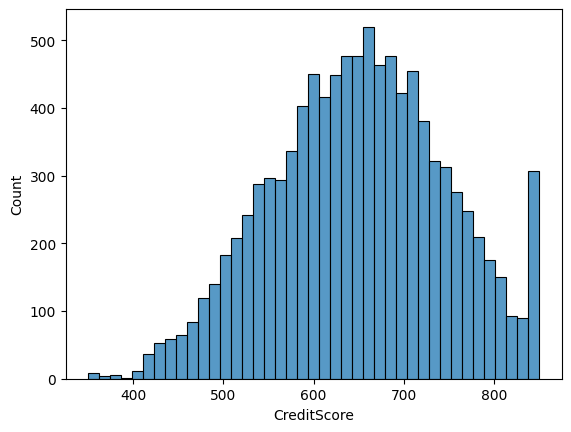

In [47]:
sns.histplot(df["CreditScore"])

<Axes: xlabel='Tenure', ylabel='Count'>

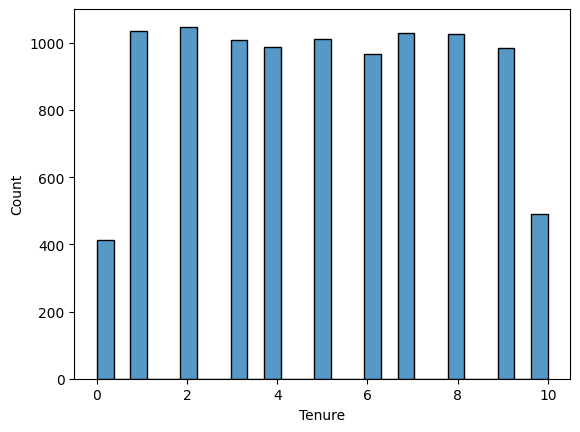

In [48]:
sns.histplot(df["Tenure"])

<Axes: xlabel='Balance', ylabel='Count'>

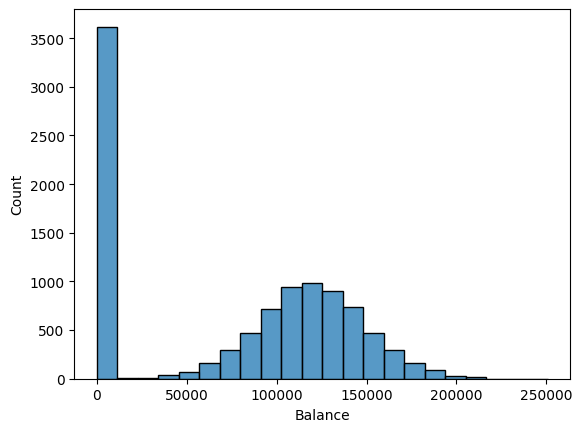

In [49]:
sns.histplot(df["Balance"])

<Axes: ylabel='Balance'>

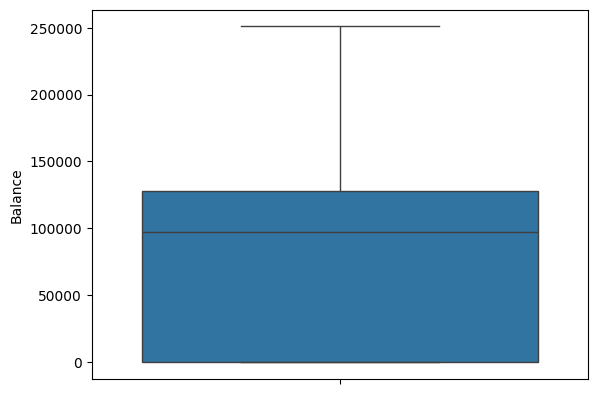

In [50]:
sns.boxplot(df["Balance"])

<Axes: ylabel='Age'>

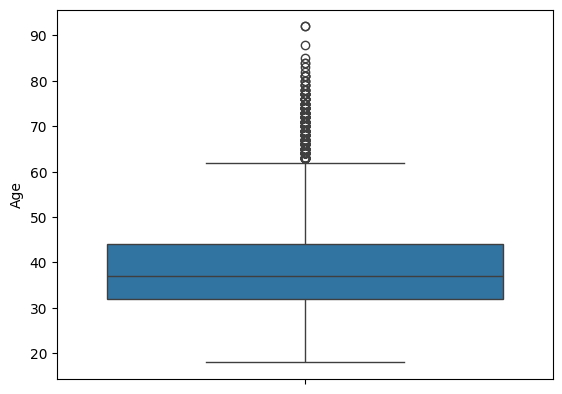

In [51]:
sns.boxplot(df["Age"])

<Axes: xlabel='Age', ylabel='Count'>

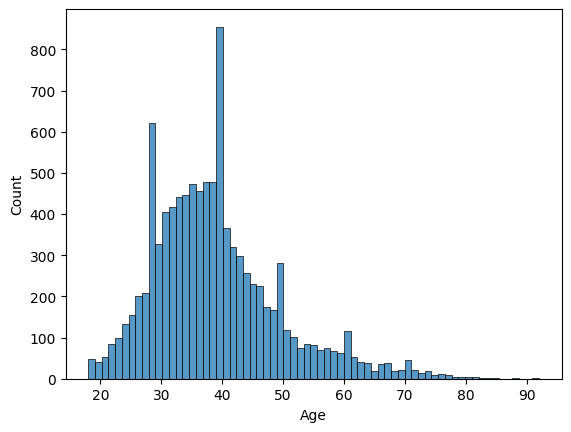

In [53]:
sns.histplot(df["Age"])

In [110]:
rs = RobustScaler().fit_transform(df[["Age"]])
st = StandardScaler().fit_transform(df[["Age"]])
nm = MinMaxScaler().fit_transform(df[["Age"]])

<Axes: ylabel='Count'>

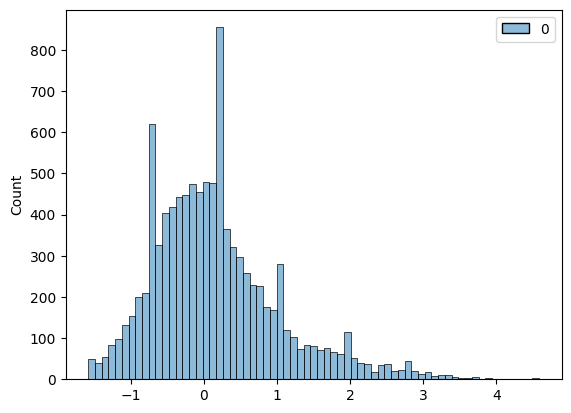

In [67]:
sns.histplot(rs)

<Axes: ylabel='Count'>

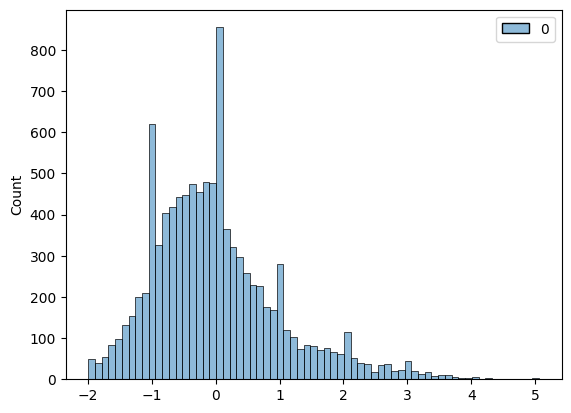

In [68]:
sns.histplot(st)

In [111]:
import numpy as np


print(np.min(nm), np.mean(nm), np.median(nm), np.max(nm))
print(np.min(st), np.mean(st), np.median(st), np.max(st))
print(np.min(rs), np.mean(rs), np.median(rs), np.max(rs))

0.0 0.282727027027027 0.25675675675675674 1.0000000000000002
-1.9949687539344934 2.318145675417327e-16 -0.18325053060976135 5.0611969579618314
-1.5833333333333333 0.16015 0.0 4.583333333333333


<Axes: xlabel='Tenure', ylabel='Count'>

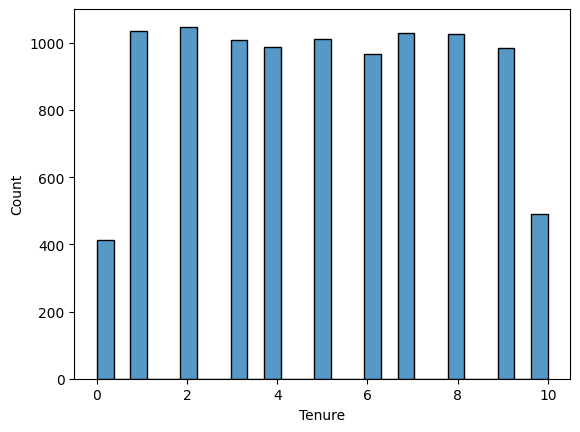

In [69]:
sns.histplot(df["Tenure"])

<Axes: ylabel='CreditScore'>

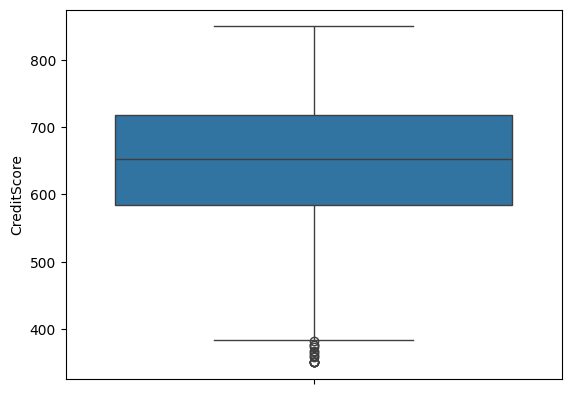

In [22]:
sns.boxplot(df["CreditScore"])

In [112]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Train Test Split

In [236]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_train.shape[1]

((8000, 10), (2000, 10), (8000,), (2000,), 10)

In [237]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,France,Male,32,6,0.00,2,1,1,179093.26
1561,632,Germany,Male,42,4,119624.60,2,1,1,195978.86
1670,559,Spain,Male,24,3,114739.92,1,1,0,85891.02
6087,561,France,Female,27,9,135637.00,1,1,0,153080.40
6669,517,France,Male,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...,...
5734,768,France,Male,54,8,69712.74,1,1,1,69381.05
5191,682,France,Female,58,1,0.00,1,1,1,706.50
5390,735,France,Female,38,1,0.00,3,0,0,92220.12
860,667,France,Male,43,8,190227.46,1,1,0,97508.04


In [241]:
feature_scaling = df.select_dtypes(exclude="object").drop(columns=["Exited"]).columns.to_list()

preprocessor = ColumnTransformer(
    [
        ("le", OrdinalEncoder(), ["Gender"]),
        ('ohe', OneHotEncoder(drop='first'), ["Geography"]),
        ("std", StandardScaler(), feature_scaling)
    ]
)

X =  preprocessor.fit_transform(X_train)

In [242]:
with open("preprocessing.pkl", "wb+") as f:
    pkl.dump(preprocessor, f)

In [244]:
X_train = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())

In [245]:
X_train.head()

,le__Gender,ohe__Geography_Germany,ohe__Geography_Spain,std__CreditScore,std__Age,std__Tenure,std__Balance,std__NumOfProducts,std__HasCrCard,std__IsActiveMember,std__EstimatedSalary
0,1.0,0.0,0.0,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670
1,1.0,1.0,0.0,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254
2,1.0,0.0,1.0,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807
3,0.0,0.0,0.0,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393
4,1.0,0.0,0.0,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600


In [246]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [257]:
pre_processor_load = None

with open("preprocessing.pkl", "rb+") as f:
    pre_processor_load = pkl.load(f)

In [259]:
print(X_test.shape)
X_test = pre_processor_load.transform(X_test)
print(X_test.shape)

(2000, 10)
(2000, 11)


#### Defining Neural Network

In [247]:
tf.random.set_seed(1234)

In [249]:
model = Sequential([
    Dense(64, activation='leaky_relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='leaky_relu'),
    Dense(1, activation="sigmoid")
])

In [250]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

#### Defining Optimizer and Loss

In [251]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True )
loss = tf.keras.losses.BinaryCrossentropy()

### Compiling model

In [252]:
model.compile(
    optimizer = opt,
    loss = loss,
    metrics= ["accuracy"]
)

### Setting up tensorboard

In [253]:
logs = "logs/fit/" + datetime.datetime.now().strftime("%m-%d-%Y-%H:%M:%S")

tf_tensorboard = TensorBoard(log_dir=logs, histogram_freq=1)

### Setting EarlyStopping

In [254]:
tf_earlystop = EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)

### Training model

In [260]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    epochs=100,
    callbacks=[tf_tensorboard, tf_earlystop]
    )

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8364 - loss: 0.3963 - val_accuracy: 0.8450 - val_loss: 0.3634
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.8538 - loss: 0.3664 - val_accuracy: 0.8595 - val_loss: 0.3514
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.8583 - loss: 0.3540 - val_accuracy: 0.8610 - val_loss: 0.3487
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.8596 - loss: 0.3493 - val_accuracy: 0.8605 - val_loss: 0.3476
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.8591 - loss: 0.3466 - val_accuracy: 0.8610 - val_loss: 0.3463
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.8604 - loss: 0.3442 - val_accuracy: 0.8605 - val_loss: 0.3451
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.8611 - loss: 0.3422 - val_accuracy: 0.8605 - val_loss: 0.3440
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.8614 - loss: 0.3

In [261]:
model.save('model.h5')

In [205]:
%reload_ext tensorboard

In [262]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6007 (pid 18309), started 0:49:36 ago. (Use '!kill 18309' to kill it.)

In [263]:
from sklearn.metrics import accuracy_score

In [265]:
model_load = tf.keras.models.load_model("model.h5")

In [331]:
x= df.iloc[[0]]
y= df.iloc[0][-1:]

In [332]:
print(x.iloc[:,: -1].shape)
x = pre_processor_load.transform(x.iloc[:,: -1])
print(x.shape)

(1, 10)
(1, 11)


In [333]:
model_load.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


array([[0.38723913]], dtype=float32)

In [334]:
y

Exited    1
Name: 0, dtype: object

In [342]:
accuracy_score(y_test, [1 if x[0] >= 0.5 else 0 for x in model.predict(X_test).tolist()])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


0.8585